In [1]:
import lifelines
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using pure Python version of concordance index. 
You can speed this up 100x by compiling the Fortran code with:
>>> python setup.py build_ext --inplace


In [17]:
%matplotlib inline
print(plt.style.available)
plt.style.use("ggplot")

['ggplot', 'bmh', 'dark_background', 'fivethirtyeight', 'grayscale']


In [3]:
cns_positive = pd.read_csv("cns positive.csv")
cns_negative = pd.read_csv("cns negative.csv")

In [4]:
cns_all = cns_positive.append(cns_negative, ignore_index=True)

In [5]:
cns_all

,Age at Dx,Bone Marrow Involvement,CNS Involvement,Date of Dx,Duration from Diagnosis to Death or Last Follow-up,Dx,Ethnicity,Extranodal (>1),Gender,IPI,LDH Elevated,Peripheral Blood Involvement,Stage,Status,Transplant,Transplant type
0,66,No,YES,5/21/2009,41.39,PTCL NOS,White,Yes,M,2,Unknown,No,III,DEAD,Yes,Auto
1,69,Yes,YES,4/27/2009,14.33,PTCL NOS,Other,Yes,M,3,Yes,Yes,IV,DEAD,No,No
2,41,No,YES,5/2/2013,19.30,PTCL NOS,White,Yes,M,2,Unknown,No,IV,ALIVE,Yes,Auto
3,27,No,YES,10/5/2006,97.96,ENKL,Native Alaskan,Yes,M,1,No,No,I,ALIVE,Yes,Allo
4,57,No,YES,6/24/2011,7.96,ENKL,White,No,F,0,No,No,II,DEAD,No,No
5,24,No,YES,6/5/2013,15.35,ENKL,Native,No,F,1,Yes,No,II,ALIVE,No,No
6,20,No,YES,1/18/2010,22.58,ENKL,Unknown,Yes,M,3,Yes,Unknown,IV,DEAD,Yes,Auto/Allo
7,52,Yes,YES,2/29/14,7.30,ENKL,Asian,Yes,M,2,Yes,Yes,IV,ALIVE,No,No
8,55,Yes,YES,10/13/2009,62.62,HSTCL,Asian,No,F,2,Yes,Yes,IV,ALIVE,Yes,Allo
9,71,Yes,YES,6/2/2011,38.40,AITL,White,No,M,2,No,Yes,IV,ALIVE,No,No


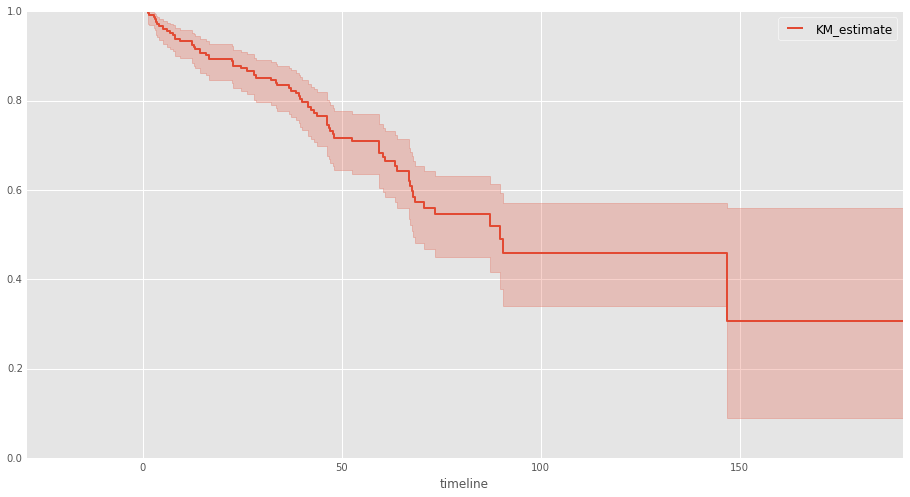

In [18]:
C = cns_all["Status"].apply(lambda x : True if x == "DEAD" else False)
T = cns_all["Duration from Diagnosis to Death or Last Follow-up"]
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=C)
kmf.plot(figsize=(14, 8))

Median CNS Positive Survival 59.37 Months
Median CNS Negative Survival 90.43 Months


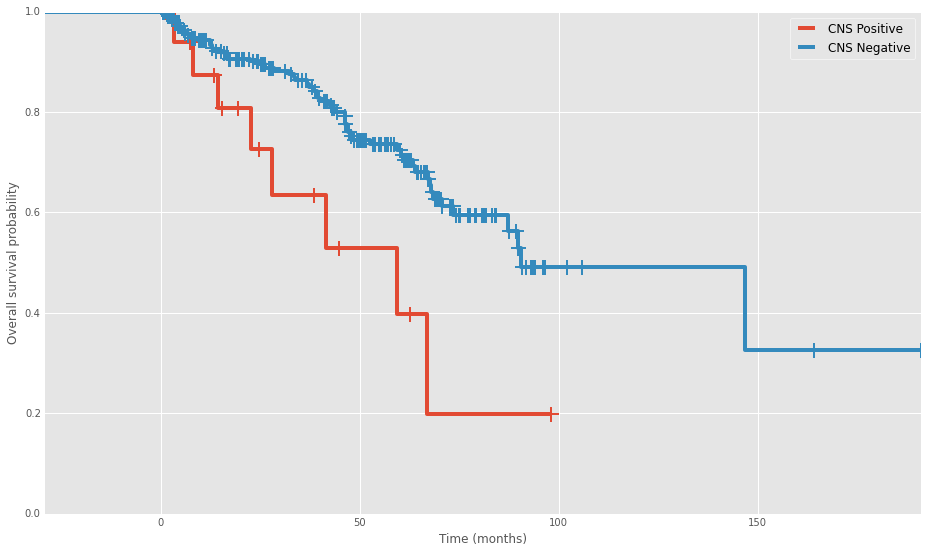

In [21]:
ax = plt.subplot(111)
cns_pos = (cns_all["CNS Involvement"] == "YES")
kmf.fit(T[cns_pos], event_observed=C[cns_pos], label="CNS Positive")
cs={'ms': 15, 'mew': 2}
kmf.plot(ax=ax, figsize=(14, 9), flat=False, show_censors=True, ci_show=False, linewidth=4, censor_styles=cs)
print("Median CNS Positive Survival {0} Months".format(kmf.median_))

kmf.fit(T[~cns_pos], event_observed=C[~cns_pos], label="CNS Negative")
kmf.plot(ax=ax, figsize=(14, 9), flat=False, show_censors=True, ci_show=False, linewidth=4, censor_styles=cs)
print("Median CNS Negative Survival {0} Months".format(kmf.median_))

plt.ylim(0,1);

plt.xlabel("Time (months)")
plt.ylabel("Overall survival probability")

In [37]:
from lifelines.statistics import logrank_test

logrank_test(T[cns_pos], T[~cns_pos], C[cns_pos], C[~cns_pos], alpha=.95 )

<lifelines.StatisticalResult: 
Results
   df: 1
   alpha: 0.95
   test: logrank
   t 0: -1
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00061 |             11.759 |      Reject Null    |        True       
>

In [16]:
cns_all.columns.unique()

array(['Age at Dx', 'Bone Marrow Involvement', 'CNS Involvement',
       'Date of Dx', 'Duration from Diagnosis to Death or Last Follow-up',
       'Dx', 'Ethnicity', 'Extranodal (>1)', 'Gender', 'IPI',
       'LDH Elevated', 'Peripheral Blood Involvement', 'Stage', 'Status',
       'Transplant', 'Transplant type'], dtype=object)

In [22]:
RELEVANT_COLUMNS = ["Age at Dx", "IPI", "Stage", "LDH Elevated", "Extranodal (>1)", "Peripheral Blood Involvement","CNS Involvement", "Status", "Duration from Diagnosis to Death or Last Follow-up"]

In [23]:
df = cns_all[RELEVANT_COLUMNS]

In [24]:
def stage_mask(stage):
    if stage == "I" or stage == "II":
        return 0
    elif stage == "III" or stage == "IV":
        return 1
    else:
        return 0

In [25]:
def transform_df(df):
    A = df["Age at Dx"].apply(lambda x: 1 if x > 60 else 0)
    B = df["IPI"].apply(lambda x: 1 if x > 2 else 0)
    C = df["Stage"].apply(stage_mask)
    D = df["Extranodal (>1)"].apply(lambda x: 1 if str(x).lower() == "yes" else 0)
    E = df["Peripheral Blood Involvement"].apply(lambda x: 1 if str(x).lower() == "yes" else 0)
    F = df["LDH Elevated"].apply(lambda x: 1 if str(x).lower() == "yes" else 0)
    G = df["CNS Involvement"].apply(lambda x: 1 if str(x).lower() == "yes" else 0)

    
    df['Age at Dx'] = A
    df['IPI'] = B
    df["Stage"] = C
    df["Extranodal (>1)"] = D
    df["Peripheral Blood Involvement"] = E
    df["LDH Elevated"] = F
    df["CNS Involvement"] = G
    return df

In [31]:
transform_df(df)

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

,Age at Dx,IPI,Stage,LDH Elevated,Extranodal (>1),Peripheral Blood Involvement,CNS Involvement,Status,Duration from Diagnosis to Death or Last Follow-up
0,1,0,1,0,1,0,1,DEAD,41.39
1,1,1,1,1,1,1,1,DEAD,14.33
2,0,0,1,0,1,0,1,ALIVE,19.30
3,0,0,0,0,1,0,1,ALIVE,97.96
4,0,0,0,0,0,0,1,DEAD,7.96
5,0,0,0,1,0,0,1,ALIVE,15.35
6,0,1,1,1,1,0,1,DEAD,22.58
7,0,0,1,1,1,1,1,ALIVE,7.30
8,0,0,1,1,0,1,1,ALIVE,62.62
9,1,0,1,0,0,1,1,ALIVE,38.40


In [26]:
#Univariate analysis. Use equal_var = False for Welch's t-test. Two-sided test.
#scipy.stats.ttest_ind(a, b, axis=0, equal_var=False)
import scipy

In [28]:
def welch(cols, df):
    for col in cols:
        a = df[df[col] == 1]["CNS Involvement"]
        b  = df[df[col] == 0]["CNS Involvement"]
        t, p = scipy.stats.ttest_ind(a, b, axis=0, equal_var=False)
        print("Attribute: {0} \n t: {1}, p: {2}".format(col, t, p))
        significant = True if p < .05 else False
        print("Significant: {0}".format(significant))
        print("\n ------------- \n")

In [46]:
welch(RISK_FACTORS, df)

Attribute: Age at Dx 
 t: -0.0798624412784834, p: 0.9364298207399115
Significant: False

 ------------- 

Attribute: IPI 
 t: -0.2949870539716678, p: 0.7684417592687491
Significant: False

 ------------- 

Attribute: Stage 
 t: 1.1630927181396162, p: 0.24628760784444229
Significant: False

 ------------- 

Attribute: LDH Elevated 
 t: -1.1198382489131427, p: 0.26382964873128184
Significant: False

 ------------- 

Attribute: Extranodal (>1) 
 t: 0.8771225377757798, p: 0.3821720454865716
Significant: False

 ------------- 

Attribute: Peripheral Blood Involvement 
 t: 1.4522005304866248, p: 0.14873230341208057
Significant: False

 ------------- 



In [178]:
from __future__ import division
def _conf_interval(ratio, std_error):
    """
    Calculate 95% confidence interval for odds ratio and relative risk.
    """

    _lci = np.log(ratio) - 1.96*std_error
    _uci = np.log(ratio) + 1.96*std_error

    lci = round(np.exp(_lci), 2)
    uci = round(np.exp(_uci), 2)

    return (lci, uci)

def relative_risk(a, b, c, d):
    
    rr = (a/(a+b))/(c/(c+d))
    rr_se = np.sqrt(((1/a)+(1/c)) - ((1/(a+b)) + (1/(c+d))))
    rr_ci = _conf_interval(rr, rr_se)

    #print("Relative risk: {0} (95% CI: {1})\n".format(round(rr, 2), rr_ci))

    return rr, rr_ci

In [277]:
def univariate_analysis(cols, df):
    for col in cols:
        
        a = df[(df[col] == 1) & (df["CNS Involvement"] == 1)].count()[0]
        b = df[(df[col] == 1) & (df["CNS Involvement"] == 0)].count()[0]
        c = df[(df[col] == 0) & (df["CNS Involvement"] == 1)].count()[0]
        d = df[(df[col] == 0) & (df["CNS Involvement"] == 0)].count()[0]
        rr, CI = relative_risk(a, b, c, d)
        odds, p = scipy.stats.fisher_exact([[a, b], [c, d]])
        print("Risk Factor: {0} \n Relative Risk: {1}, 95% CI: {2}".format(col, rr, CI))
        print("p-value: {0}, odds-ratio: {1}".format(p, odds))
        significant = True if p < .05 else False
        print("Significant: {0}".format(significant))
        print("\n -------------")

In [290]:
univariate_analysis(RISK_FACTORS, df)

Risk Factor: Age at Dx 
 Relative Risk: 0.9736070381231671, 95% CI: (0.51000000000000001, 1.8799999999999999)
p-value: 1.0, odds-ratio: 0.9696969696969697
Significant: False

 -------------
Risk Factor: IPI 
 Relative Risk: 0.9, 95% CI: (0.44, 1.8400000000000001)
p-value: 0.8412872080410476, odds-ratio: 0.8861538461538462
Significant: False

 -------------
Risk Factor: Stage 
 Relative Risk: 1.5056497175141244, 95% CI: (0.70999999999999996, 3.1800000000000002)
p-value: 0.32632076222678325, odds-ratio: 1.5927152317880795
Significant: False

 -------------
Risk Factor: LDH Elevated 
 Relative Risk: 0.6951600312256049, 95% CI: (0.35999999999999999, 1.3300000000000001)
p-value: 0.27661693381924474, odds-ratio: 0.6588029707295763
Significant: False

 -------------
Risk Factor: Extranodal (>1) 
 Relative Risk: 1.3636363636363635, 95% CI: (0.70999999999999996, 2.6099999999999999)
p-value: 0.41528035746113356, odds-ratio: 1.434017595307918
Significant: False

 -------------
Risk Factor: Periph

In [225]:
from lifelines import AalenAdditiveFitter, CoxPHFitter

test_df = df
test_df["Status"].apply(lambda x : True if x == "DEAD" else False)
# Using Cox Proportional Hazards model
cf = CoxPHFitter()
cf.fit(test_df, 'Duration from Diagnosis to Death or Last Follow-up', event_col='Status')
cf.print_summary()

# Using Aalen's Additive model
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(test_df, 'Duration from Diagnosis to Death or Last Follow-up', event_col='Status')

n=259, number of events=259

                                   coef  exp(coef)  se(coef)          z         p  lower 0.95  upper 0.95    
Age at Dx                     1.739e-01  1.190e+00 6.606e-02  2.633e+00 8.470e-03   4.441e-02   3.034e-01  **
IPI                           1.163e-01  1.123e+00 7.264e-02  1.601e+00 1.094e-01  -2.611e-02   2.587e-01    
Stage                        -9.178e-02  9.123e-01 6.975e-02 -1.316e+00 1.882e-01  -2.285e-01   4.494e-02    
LDH Elevated                 -1.333e-01  8.752e-01 6.435e-02 -2.071e+00 3.832e-02  -2.594e-01  -7.141e-03   *
Extranodal (>1)               7.123e-02  1.074e+00 6.317e-02  1.128e+00 2.595e-01  -5.261e-02   1.951e-01    
Peripheral Blood Involvement  8.008e-02  1.083e+00 6.323e-02  1.266e+00 2.054e-01  -4.388e-02   2.040e-01    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.569
 [-----------------100%-----------------] 259 of 259 complete in 0.2 sec


<lifelines.AalenAdditiveFitter: fitted with 259 observations, 0 censored>

In [221]:
cf.hazards_

,Age at Dx,IPI,Stage,LDH Elevated,Extranodal (>1),Peripheral Blood Involvement,CNS Involvement
coef,0.171863,0.117242,-0.092814,-0.12766,0.06288,0.069237,0.078597


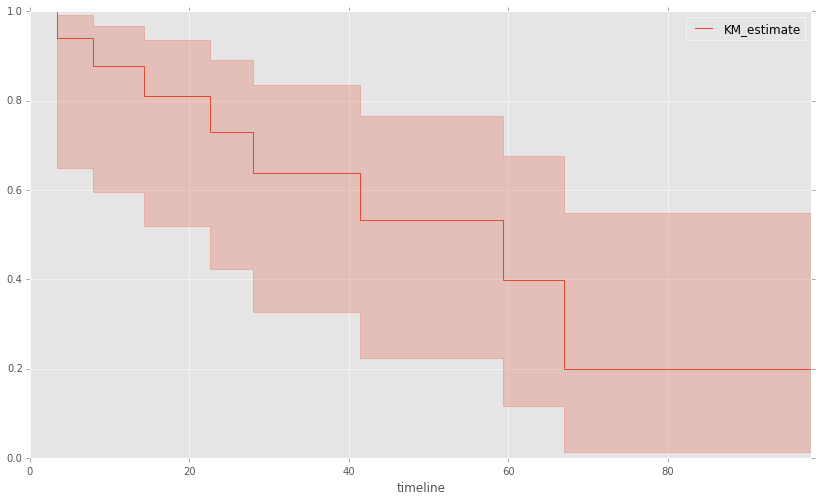

In [228]:
C = cns_positive["Status"].apply(lambda x : True if x == "DEAD" else False)
T = cns_positive["Duration from Diagnosis to Death or Last Follow-up"]
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=C)
kmf.plot(figsize=(14, 8))

Median Tranplant Recipient Survival: 59.37 Months
Median Survival with No Transplant: inf Months


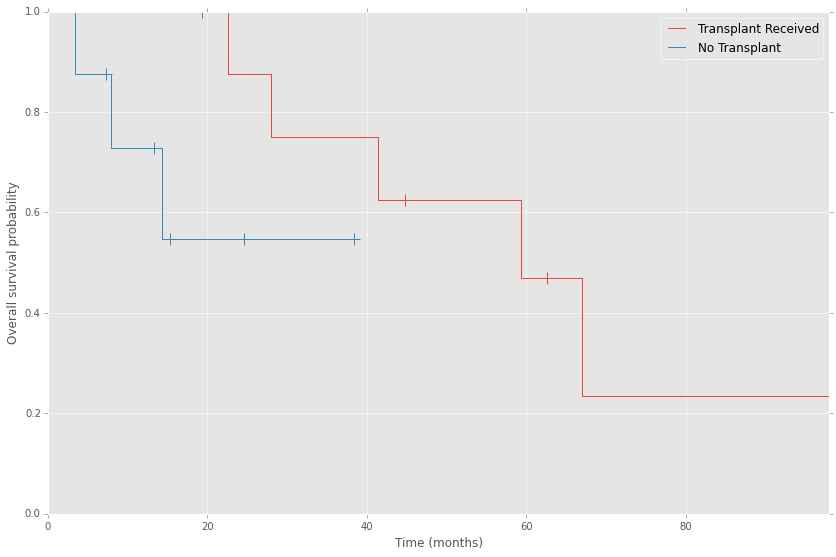

In [244]:
ax = plt.subplot(111)
transplant_pos = (cns_positive["Transplant"] == "Yes")
kmf.fit(T[transplant_pos], event_observed=C[transplant_pos], label="Transplant Received")
kmf.plot(ax=ax, figsize=(14, 9), flat=False, show_censors=True, ci_show=False)
print("Median Tranplant Recipient Survival: {0} Months".format(kmf.median_))

kmf.fit(T[~transplant_pos], event_observed=C[~transplant_pos], label="No Transplant")
kmf.plot(ax=ax, figsize=(14, 9), show_censors=True, ci_show=False)
print("Median Survival with No Transplant: {0} Months".format(kmf.median_))

plt.ylim(0,1);

plt.xlabel("Time (months)")
plt.ylabel("Overall survival probability")

In [239]:
logrank_test(T[transplant_pos], T[~transplant_pos], C[transplant_pos], C[~transplant_pos], alpha=.95 )

<lifelines.StatisticalResult: 
Results
   df: 1
   alpha: 0.95
   test: logrank
   t 0: -1
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.12889 |              2.306 |  Cannot Reject Null |       False       
>

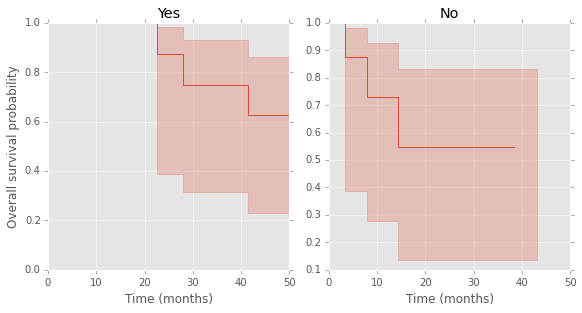

In [237]:
transplant_types = cns_positive['Transplant'].unique()

for i,transplant_type in enumerate(transplant_types):
    ax = plt.subplot(2,3,i+1)
    ix = cns_positive['Transplant'] == transplant_type
    kmf.fit( T[ix], C[ix], label=transplant_type )
    kmf.plot(ax=ax, legend=False, figsize=(12, 8))
    plt.title(transplant_type)
    plt.xlim(0,50)
    if i==0:
        plt.ylabel('Overall survival probability')
    plt.xlabel("Time (months)")
plt.tight_layout()

In [273]:
cns_positive[cns_positive["Transplant"] == "No"]

,Gender,Ethnicity,Date of Dx,Age at Dx,Dx,Stage,IPI,LDH Elevated,Extranodal (>1),CNS Involvement,Bone Marrow Involvement,Peripheral Blood Involvement,Transplant type,Transplant,Status,Duration from Diagnosis to Death or Last Follow-up
1,M,Other,4/27/2009,69,PTCL NOS,IV,3,Yes,Yes,YES,Yes,Yes,No,No,DEAD,14.33
4,F,White,6/24/2011,57,ENKL,II,0,No,No,YES,No,No,No,No,DEAD,7.96
5,F,Native,6/5/2013,24,ENKL,II,1,Yes,No,YES,No,No,No,No,ALIVE,15.35
7,M,Asian,2/29/14,52,ENKL,IV,2,Yes,Yes,YES,Yes,Yes,No,No,ALIVE,7.30
9,M,White,6/2/2011,71,AITL,IV,2,No,No,YES,Yes,Yes,No,No,ALIVE,38.40
10,F,Native,1/25/2012,57,AITL,IV,3,Yes,Yes,YES,Yes,Unknown,No,No,DEAD,3.39
12,M,Other,5/22/2013,79,AITL,II,1,No,No,YES,No,Unknown,No,No,ALIVE,13.35
15,M,White,8/14/2008,59,T-CLL,IV,1,No,No,YES,Yes,Yes,No,No,UNKNOWN,24.62


In [33]:
df.to_csv("cns_risk.csv", headers=False)

In [34]:
import statsmodels.api as sm

In [52]:
RISK_FACTORS = ["Age at Dx", "IPI", "Stage", "LDH Elevated", "Extranodal (>1)", "Peripheral Blood Involvement"]
RISK_FACTORS2 = ["Age at Dx", "Stage", "LDH Elevated"]

In [59]:
logit = sm.Logit(df['CNS Involvement'], df[RISK_FACTORS2])
 
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.448444
         Iterations 6


In [60]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:        CNS Involvement   No. Observations:                  259
Model:                          Logit   Df Residuals:                      256
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 Jun 2015   Pseudo R-squ.:                 -0.1534
Time:                        15:37:12   Log-Likelihood:                -116.15
converged:                       True   LL-Null:                       -100.70
                                        LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Age at Dx       -0.7272      0.353     -2.062      0.039        -1.418    -0.036
Stage           -1.0643      0.247     -4.300      0.000        -1.549    -0.579
LDH Elevated    -1.2881      0.323     -3.99

In [61]:
print(np.exp(result.params))

Age at Dx       0.483268
Stage           0.344982
LDH Elevated    0.275803
dtype: float64
